# Task - 1:
## Score Prediction for Study Hours
As an intern of The Sparks Foundation it's the first task to predict student scores from their study hours using single variable linear regression.

## TO DO:
* First Download The dataset from [Github](https://raw.githubusercontent.com/rubayetalamnse/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv)
* then apply linear regression model
* Predict the percentage of an student based on the no. of study hours.
* what will be predicted score if a student studies for 9.25 hrs/day?

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets, linear_model
%matplotlib inline

In [2]:
from matplotlib import rcParams

In [3]:
rcParams['font.size'] = 14
rcParams['figure.figsize'] = (12,6)
rcParams['lines.linewidth'] = 2

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
df  = pd.read_csv('study_hours.csv')

In [6]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
df.shape

(25, 2)

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


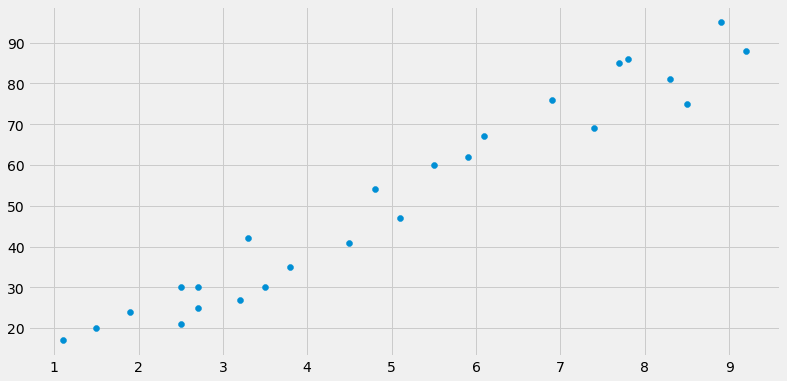

In [9]:
plt.scatter(df['Hours'],df['Scores'])

we can't see much outliers in our dataset. As our data is very small, only contains 25 rows and 2 columns.

In [10]:
# we have to find score from the study hours
x = df[['Hours']] #independent variable
y = df[['Scores']] # dependent variable

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# 70% of the data will be used to train the model
# 30% of the data will be used to test the model
x_train ,  x_test, y_train, y_test = train_test_split(x,y,test_size = .30)

In [13]:
x_train # contains 17 data, as 70% of 25 is 17.5

,Hours
23,6.9
6,9.2
3,8.5
20,2.7
17,1.9
10,7.7
4,3.5
12,4.5
8,8.3
18,6.1


In [14]:
x_test

,Hours
16,2.5
15,8.9
2,3.2
7,5.5
11,5.9
5,1.5
13,3.3
1,5.1


In [15]:
y_train

,Scores
23,76
6,88
3,75
20,30
17,24
10,85
4,30
12,41
8,81
18,67


In [16]:
y_test

,Scores
16,30
15,95
2,27
7,60
11,62
5,20
13,42
1,47


- We will not consider x_test, y_test while training the model.
- after training our model we will start comparing our predicted y_test and actual y_test to see how good our model is.

In [17]:
# let's create our model
from sklearn.linear_model import LinearRegression

In [18]:
# we will create an instance
lr = LinearRegression()

In [19]:
# we will fit our test data to this instance
lr.fit(x_train,y_train)

LinearRegression()

#### What is happening:
 -  our model is trained
 - we will now predict the values of scores(y_test) by our study hours(x_test)
 - we will name the predicted vlues as y_pred and we will compare them with y_test

In [20]:
y_pred = lr.predict(x_test)

In [21]:
# our predicted score 
y_pred

array([[26.29392372],
       [88.65684695],
       [33.11486845],
       [55.52654398],
       [59.42422668],
       [16.54971696],
       [34.08928912],
       [51.62886128]])

In [22]:
# our actual score
y_test

,Scores
16,30
15,95
2,27
7,60
11,62
5,20
13,42
1,47


In [23]:
# percentage of accuracy---
lr.score(x_test,y_test)

0.9482647525088308

### ERROR
- the difference between predicted score and actual score.
- In machine learning error is called as **cost function**
- To find error in ML we use MSE, RMSE, MAE
- MSE - mean squared error, RMSE - root mean squared error, MAE - mean absolute error
_ The lower the value of RMSE, the better the forecast.
- if the value is  0 or 0.1 means the value is over-fitted. means the program has memorized the values which is not good.
-if comparing the prediction accuracy among different linear regression (LR)models then RMSE is a better option as it is simple to calculate and differentiable. However, if your dataset has outliers then choose MAE over RMSE.

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mse = mean_squared_error(y_test,y_pred)

In [26]:
mse

26.739847683756036

In [27]:
# let's check out our root mean squared error
rmse = np.sqrt(mse)

In [28]:
rmse

5.171058661797992

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
mae = mean_absolute_error(y_test,y_pred)

In [31]:
mae

4.900397788708206

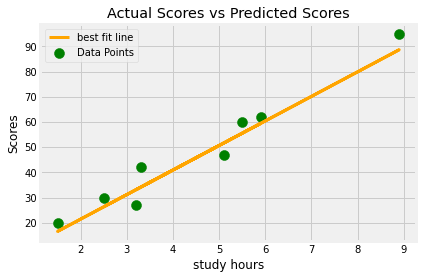

In [41]:
# x_test = number of hours studied, y_pred = score predicted depending on number of hours studied
#let's visualize our actual vs predicted scores
#actual scores are in scatter plot, where the predicted scores will draw best fit lin
plt.title('Actual Scores vs Predicted Scores')
plt.scatter(x_test,y_test, label = 'Data Points',s = 100, color = 'green')
plt.plot(x_test,y_pred,label = 'best fit line', color = 'orange', linewidth = 3)
plt.xlabel('study hours')
plt.ylabel('Scores')
plt.legend()
plt.show();

### what will be predicted score if a student studies for 9.25 hrs/day?

In [33]:
h1 = 9.25
s1 = lr.predict(np.array([[9.25]]))

In [34]:
s1

array([[92.06731931]])

In [35]:
fs1 = float(s1)

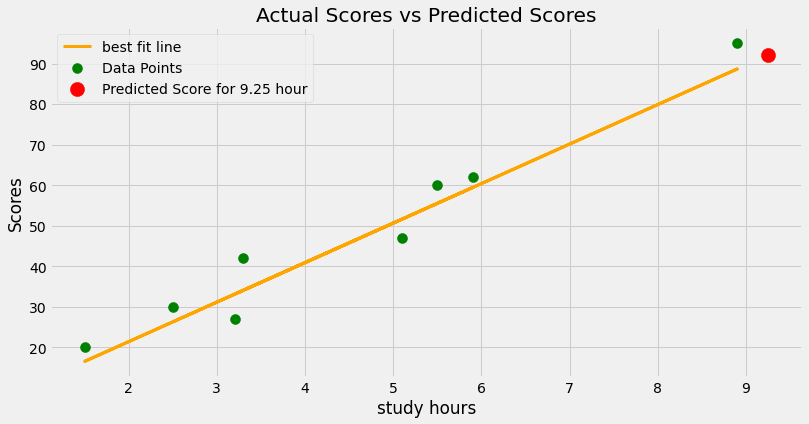

In [36]:
plt.title('Actual Scores vs Predicted Scores')
plt.scatter(x_test,y_test, label = 'Data Points',s = 100, color = 'green')
plt.scatter(h1,fs1, label='Predicted Score for 9.25 hour', s =200, color = 'red')
plt.plot(x_test,y_pred,label = 'best fit line', color = 'orange', linewidth = 3)
plt.xlabel('study hours')
plt.ylabel('Scores')
plt.legend()
plt.show();

# Discussion:
- our error is very very high, 
    - mse = 26.739, 
    - rmse = 5.171, and 
    - mae = 4.900 <br>
the error must be between 0 to 1
- we have to use other algorithm to predict with less error
- or we have to work on our data, this data is not sufficient/ valid
- if a student study 9.25 hours per day they will get 92.06 marks, but only studying for long hours is not enough. Understanding the concept, focus, concentrate, environment, other distraction etc matters.
- We can see most our data points are above the best fit lines, they are overfitted.<br>
    - Overfitting is a modeling error which occurs when a function is too closely fit to a limited set of data points.
    - Overfitting is when the testing error is high compared to the training error, or the gap between the two is large.
- Only 2 points are under the the curve.
    - Underfitting refers to a model that can neither model the training data nor generalize to new data.
    - Underfitting is when the training error is high. 